In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

<p><b> Data Wrangling and Visualization

In [2]:
df = pd.read_csv("/home/tukai/Desktop/Hacker Rank Data Scientist Test/Predict  Life Expectancy/Train.txt", index_col = 0)
df.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy
0,120540.0,2.632839e+06,5.417843e+06,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195
1,752610.0,2.403039e+07,4.957554e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366
2,1396.0,3.000000e+03,8.000000e+01,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000
3,2758812.0,1.228845e+08,1.050943e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197
4,340.0,1.100000e+04,1.699000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561


In [3]:
df.shape

(362, 16)

In [4]:
df.dtypes

surface_area                     float64
agricultural_land                float64
forest_area                      float64
armed_forces_total               float64
urban_pop_major_cities           float64
urban_pop_minor_cities           float64
national_income                   object
inflation_annual                 float64
inflation_monthly                float64
inflation_weekly                 float64
mobile_subscriptions              object
internet_users                    object
secure_internet_servers_total    float64
improved_sanitation               object
women_parliament_seats_rate       object
life_expectancy                  float64
dtype: object

In [5]:
df.describe()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,inflation_annual,inflation_monthly,inflation_weekly,secure_internet_servers_total,life_expectancy
count,3.620000e+02,3.580000e+02,3.570000e+02,3.180000e+02,360.000000,360.000000,146.000000,156.000000,20.000000,3.520000e+02,362.000000
mean,4.021884e+06,1.594881e+08,1.204151e+08,9.849864e+05,27.659456,29.175242,1.681539,0.475969,0.396478,2.949654e+08,71.059691
std,1.234491e+07,4.964143e+08,3.796623e+08,2.994686e+06,20.512885,21.206494,0.980308,0.153430,0.203583,7.234006e+08,8.332818
min,3.030000e+01,3.000000e+02,0.000000e+00,5.000000e+01,0.091444,0.074575,-2.372263,0.250543,0.209993,4.002500e+04,48.850634
25%,2.783000e+04,1.054198e+06,4.951445e+05,1.218000e+04,10.624625,11.013743,1.202953,0.347799,0.232118,3.468446e+06,65.469854
50%,2.037745e+05,5.360256e+06,3.928535e+06,5.352500e+04,24.459439,26.735127,1.762683,0.459790,0.297938,2.671228e+07,73.238024
75%,1.081610e+06,4.221935e+07,2.241297e+07,2.598000e+05,38.587177,43.499418,2.485675,0.577340,0.537541,2.173937e+08,77.125610
max,1.343253e+08,5.067600e+09,4.132117e+09,2.720662e+07,92.409069,89.142904,2.997694,0.810152,0.781527,8.207343e+09,83.480488


<p><b> Discriptive statistic indicates that in general "surface_area" values (total area of lands) are smaller than "argicultural_land" and "forst_area" values (argicultural and forest portions of the total area). </n>It seems there is data entry problem. Following analysese are preformed to address this issue.

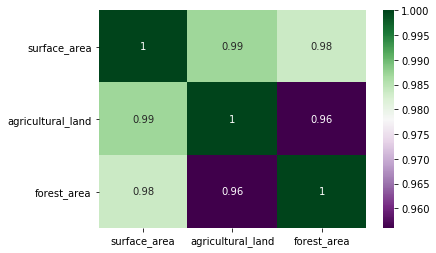

In [6]:
# Check if multi-collineerity is present 
sns.heatmap(df[['surface_area', 'agricultural_land', 'forest_area']].corr(), cmap='PRGn', annot=True)

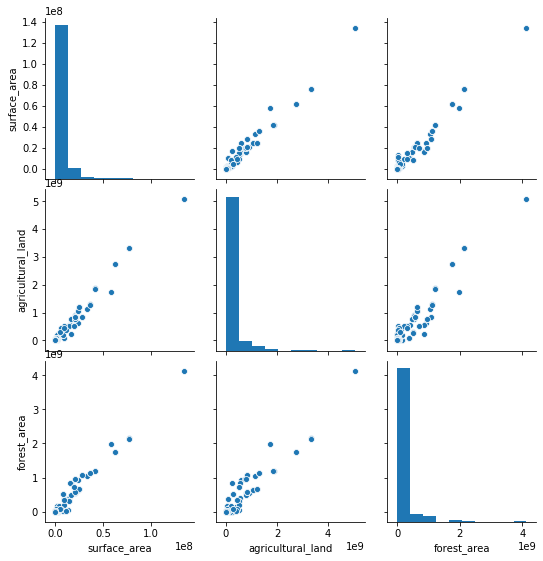

In [7]:
sns.pairplot(df[['surface_area', 'agricultural_land', 'forest_area']])

In [8]:
# make a copy ofthe dataframe 
df1 = df.copy()

# Step 1: Multiply 'surface_area' by 100
df1['surface_area'] = df1['surface_area']*100

# Step 2: Creates new variables
df1['agricultural_portion'] = df1['agricultural_land'] / df1['surface_area'] 
df1['forest_portion'] = df1['forest_area'] / df1['surface_area']

# Step 3: Remove 'agricultural_land' and 'forest_area' colums from dataset
df1.drop(['agricultural_land', 'forest_area'], axis=1, inplace=True)

# Show the first 10 row of df1
df1.head(10)

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agricultural_portion,forest_portion
0,1.205400e+07,1379000.0,55.747169,4.688831,unknown,NaN,NaN,NaN,less than 1 per person,0 per 1000 people,NaN,high access,[0%-25%),69.494195,0.218420,0.449464
1,7.526100e+07,16500.0,16.890687,23.136313,very low,NaN,0.581473,NaN,less than 1 per person,154 per 1000 people,2.623624e+06,low access,[0%-25%),59.237366,0.319294,0.658715
2,1.396000e+05,NaN,18.390090,23.139910,unknown,NaN,NaN,NaN,more than 1 per person,90 per 100 people,1.656589e+09,no info,unknown,81.300000,0.021490,0.000573
3,2.758812e+08,1518650.0,50.966885,24.522427,high,1.374906,NaN,NaN,more than 1 per person,76 per 100 people,6.625072e+08,very high access,[25%-50%),81.373197,0.445426,0.380940
4,3.400000e+04,NaN,5.311885,30.271115,unknown,-0.044229,NaN,NaN,more than 1 per person,350 per 1000 people,2.832808e+07,very high access,[25%-50%),73.193561,0.323529,0.499706
5,7.835600e+07,612800.0,37.699524,34.134476,medium low,NaN,0.740964,NaN,less than 1 per person,45 per 100 people,1.166004e+08,very high access,[0%-25%),74.862439,0.499032,0.148224
6,2.846040e+09,5032780.0,32.853558,37.469387,medium high,2.773339,NaN,NaN,more than 1 per person,64 per 100 people,4.702241e+08,very high access,[0%-25%),76.569368,0.294847,0.379839
7,5.490910e+07,325600.0,24.582761,54.237239,high,1.955685,NaN,NaN,less than 1 per person,81 per 100 people,4.093085e+08,very high access,[25%-50%),81.968293,0.526820,0.304076
8,3.571700e+07,186450.0,18.091168,56.596832,high,2.008491,NaN,NaN,more than 1 per person,82 per 100 people,1.110775e+09,very high access,[25%-50%),80.892683,0.478109,0.327452
10,7.160000e+04,147600.0,51.288344,48.711656,unknown,NaN,0.377388,NaN,more than 1 per person,72 per 100 people,6.353061e+08,very high access,[0%-25%),81.995122,0.010340,0.231586


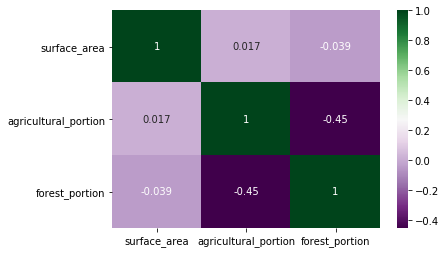

In [9]:
sns.heatmap(df1[['surface_area', 'agricultural_portion', 'forest_portion']].corr(), cmap='PRGn', annot=True)

In [10]:
# Checking null values
df1.isnull().sum()

surface_area                       0
armed_forces_total                44
urban_pop_major_cities             2
urban_pop_minor_cities             2
national_income                    0
inflation_annual                 216
inflation_monthly                206
inflation_weekly                 342
mobile_subscriptions               0
internet_users                     0
secure_internet_servers_total     10
improved_sanitation                0
women_parliament_seats_rate        0
life_expectancy                    0
agricultural_portion               4
forest_portion                     5
dtype: int64

In [11]:
# To find for how many instances all the three values are missing
#len(df1[(df1['inflation_annual'].isnull()) & (df1['inflation_monthly'].isnull()) & (df1['inflation_weekly'].isnull())])

# Replace missing values in column 'inflation_annual' with information from
# columns 'inflation_monthly' & 'inflation_weekly'

for i in df1.index:
    if np.isnan(df1.loc[i, 'inflation_annual']):
        if np.isnan(df1.loc[i, 'inflation_monthly']):
            df1.loc[i, 'inflation_annual'] = 52 * df1.loc[i, 'inflation_weekly']
        else:
            df1.loc[i, 'inflation_annual'] = 12 * df1.loc[i, 'inflation_monthly']

# Remove columns 'inflation_monthly' & 'inflation_weekly'
df1.drop(['inflation_monthly', 'inflation_weekly'], axis=1, inplace=True)

In [12]:
df1.isnull().sum()

surface_area                      0
armed_forces_total               44
urban_pop_major_cities            2
urban_pop_minor_cities            2
national_income                   0
inflation_annual                 40
mobile_subscriptions              0
internet_users                    0
secure_internet_servers_total    10
improved_sanitation               0
women_parliament_seats_rate       0
life_expectancy                   0
agricultural_portion              4
forest_portion                    5
dtype: int64

In [13]:
# Convert categorical and ordinal fearures into numeric features
# Decide which categorical variables you want to use in model
for col_name in df1.columns:
    if df1[col_name].dtypes == 'object':
        unique_cat = len(df1[col_name].unique())
        print("Feature '{col_name}' has {unique_cat} unique categories".format(col_name=col_name, unique_cat=unique_cat))

Feature 'national_income' has 7 unique categories
Feature 'mobile_subscriptions' has 5 unique categories
Feature 'internet_users' has 198 unique categories
Feature 'improved_sanitation' has 6 unique categories
Feature 'women_parliament_seats_rate' has 4 unique categories


<p><b>There are too many categories in 'internet_users'. It's more simillar to a numeric feature! Let's check...

In [14]:
df1['internet_users']

0        0 per 1000 people
1      154 per 1000 people
2        90 per 100 people
3        76 per 100 people
4      350 per 1000 people
              ...         
457      90 per 100 people
458      84 per 100 people
459      58 per 100 people
460      44 per 100 people
461      45 per 100 people
Name: internet_users, Length: 362, dtype: object

In [15]:
# Convert 'internet_users' column to associated percentages
variable_split = df1['internet_users'].str.split()
df1['percent_internet_users'] = (pd.to_numeric(variable_split.str.get(0), errors='coerce') / 
                          pd.to_numeric(variable_split.str.get(2), errors='coerce'))
# Remove 'internet_users' column
df1.drop('internet_users', axis=1, inplace=True)
df1.head()

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agricultural_portion,forest_portion,percent_internet_users
0,12054000.0,1379000.0,55.747169,4.688831,unknown,NaN,less than 1 per person,NaN,high access,[0%-25%),69.494195,0.218420,0.449464,0.000
1,75261000.0,16500.0,16.890687,23.136313,very low,6.977676,less than 1 per person,2.623624e+06,low access,[0%-25%),59.237366,0.319294,0.658715,0.154
2,139600.0,NaN,18.390090,23.139910,unknown,NaN,more than 1 per person,1.656589e+09,no info,unknown,81.300000,0.021490,0.000573,0.900
3,275881200.0,1518650.0,50.966885,24.522427,high,1.374906,more than 1 per person,6.625072e+08,very high access,[25%-50%),81.373197,0.445426,0.380940,0.760
4,34000.0,NaN,5.311885,30.271115,unknown,-0.044229,more than 1 per person,2.832808e+07,very high access,[25%-50%),73.193561,0.323529,0.499706,0.350


In [16]:
# Check the frequency of categories (labels) in each categorical variable 
for name in df1.select_dtypes(include=['object']):
    print(name,':')
    print(df1[name].value_counts(),'\n')

national_income :
low            81
very low       77
medium low     76
unknown        48
high           37
medium high    31
very high      12
Name: national_income, dtype: int64 

mobile_subscriptions :
more than 1 per person    188
less than 1 per person    164
unknown                     7
more than 2 per person      2
more than 3 per person      1
Name: mobile_subscriptions, dtype: int64 

improved_sanitation :
very high access    155
low access           55
medium access        54
high access          47
very low access      33
no info              18
Name: improved_sanitation, dtype: int64 

women_parliament_seats_rate :
[0%-25%)     249
[25%-50%)     82
unknown       30
[50%-75%)      1
Name: women_parliament_seats_rate, dtype: int64 



In [17]:
# Assign "mobile_subscriptions" values to 1 if mobile subscriptions is
# less than 1 per person, otherwise 2:
df1['mobile_subscriptions'] = [1 if x == 'less than 1 per person' else 2 for x in df1['mobile_subscriptions']]

In [18]:
# Assign "women_parliament_seats_rate" to 1 if women _parliament seat _rate is
# [0%-25%), 2 if it is [25%-75%), or 3 if unknown:

df1['women_parliament_seats_rate'] = (
    df1['women_parliament_seats_rate'].replace('[0%-25%)', 1))
df1['women_parliament_seats_rate'] = (
    df1['women_parliament_seats_rate'].replace('[25%-50%)', 2))
df1['women_parliament_seats_rate'] = (
    df1['women_parliament_seats_rate'].replace('[50%-75%)', 2))
df1['women_parliament_seats_rate'] = (
    df1['women_parliament_seats_rate'].replace('unknown', 3))

In [19]:
# Assign numeric values to the levels of "national_income" (ordinal variable):
mapper_1 = {'very low': 1, 'medium low': 2, 'low': 3,
            'medium high': 4, 'high': 5, 'very high': 6,
            'unknown': 7}
# df1['national_income'].replace(mapper_1, inplace=True)
df1['national_income'] = df1['national_income'].map(mapper_1)

<p><b>Handling missing data

In [20]:
# make a copy of df1  
df2 = df1.copy()
# How much of your data is missing?
df2.isnull().sum().sort_values(ascending = False)

armed_forces_total               44
inflation_annual                 40
secure_internet_servers_total    10
percent_internet_users            6
forest_portion                    5
agricultural_portion              4
urban_pop_minor_cities            2
urban_pop_major_cities            2
life_expectancy                   0
women_parliament_seats_rate       0
improved_sanitation               0
mobile_subscriptions              0
national_income                   0
surface_area                      0
dtype: int64

In [21]:
# Impute missing values using Imputer in sklearn.preprocessing

class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, X, y=None):

        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype('O') else X[c].mean() for c in X],
            index=X.columns)

        return self

    def transform(self, X, y=None):
        return X.fillna(self.fill)
    
df2 = DataFrameImputer().fit_transform(df2)

In [22]:
df2.isnull().sum().sort_values(ascending = False)

percent_internet_users           0
forest_portion                   0
agricultural_portion             0
life_expectancy                  0
women_parliament_seats_rate      0
improved_sanitation              0
secure_internet_servers_total    0
mobile_subscriptions             0
inflation_annual                 0
national_income                  0
urban_pop_minor_cities           0
urban_pop_major_cities           0
armed_forces_total               0
surface_area                     0
dtype: int64

In [23]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in df2.columns:
    if df2[column_name].dtype == object:
        df2[column_name] = le.fit_transform(df2[column_name])
    else:
        pass

In [24]:
df2.head()

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,life_expectancy,agricultural_portion,forest_portion,percent_internet_users
0,12054000.0,1.379000e+06,55.747169,4.688831,7,4.810113,1,2.949654e+08,0,1,69.494195,0.218420,0.449464,0.000
1,75261000.0,1.650000e+04,16.890687,23.136313,1,6.977676,1,2.623624e+06,1,1,59.237366,0.319294,0.658715,0.154
2,139600.0,9.849864e+05,18.390090,23.139910,7,4.810113,2,1.656589e+09,3,3,81.300000,0.021490,0.000573,0.900
3,275881200.0,1.518650e+06,50.966885,24.522427,5,1.374906,2,6.625072e+08,4,2,81.373197,0.445426,0.380940,0.760
4,34000.0,9.849864e+05,5.311885,30.271115,7,-0.044229,2,2.832808e+07,4,2,73.193561,0.323529,0.499706,0.350


<p><b>Visualization, Modeling, Machine Learning</b></p>
Can you construct a reliable model that predicts the life expectancy of an area (country, region, group of countries) using socioeconomic variables and identify how different features influence their decision? Please explain your findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.

*Build an optimized model that effectively solves the business problem.
*The model would be evaluated on the basis of Mean Absolute Error.
*Read the Test.csv file and prepare features for testing.

In [25]:
def plot_histogram(x):
    plt.hist(x, color='gray', edgecolor='black', alpha=0.8)
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

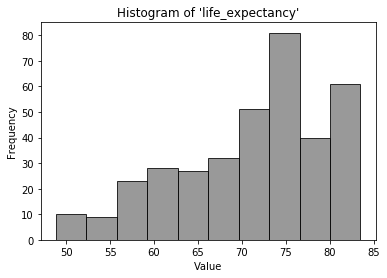

In [26]:
# Plot distribution of traget (outcome) variable in the training data
plot_histogram(df2['life_expectancy'])

In [27]:
# Loading Test data
test_data=pd.read_csv('/home/tukai/Desktop/Hacker Rank Data Scientist Test/Predict  Life Expectancy/Test.txt',index_col=0)
test_data.head()

,surface_area,agricultural_land,forest_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,inflation_monthly,inflation_weekly,mobile_subscriptions,internet_users,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate
9,322460.0,2.088892e+07,1.054769e+07,NaN,0.846584,51.919416,low,2.569961,NaN,NaN,less than 1 per person,84 per 1000 people,1849926.0,very low access,[0%-25%)
16,513120.0,2.220651e+07,1.641032e+07,453550.0,42.139810,5.803190,low,2.184886,NaN,NaN,more than 1 per person,289 per 1000 people,17983312.0,very high access,[0%-25%)
19,18580.0,1.872230e+05,8.527691e+05,NaN,1.699056,67.396944,unknown,NaN,NaN,NaN,less than 1 per person,66 per 100 people,240458015.0,very high access,unknown
23,112490.0,3.252347e+06,4.857911e+06,20000.0,48.602426,4.934574,low,NaN,0.430158,NaN,less than 1 per person,178 per 1000 people,9427882.0,high access,[0%-25%)
28,783560.0,3.911844e+07,1.171853e+07,612800.0,43.734006,28.635994,medium low,NaN,0.624424,NaN,less than 1 per person,46 per 100 people,50379814.0,very high access,[0%-25%)


In [28]:
# Create a copy of test dataframe
tdf = test_data.copy()

# Step 1: Multiply 'surface_area' by 100
tdf['surface_area'] = tdf['surface_area'] * 100

# Step 2: Creates new variables 
tdf['agricultural_portion'] = tdf['agricultural_land'] / tdf['surface_area'] 
tdf['forest_portion'] = tdf['forest_area'] / tdf['surface_area']

# Step 3: Remove 'agricultural_land' and 'forest_area' colums from dataset
tdf.drop(['agricultural_land', 'forest_area'], axis=1, inplace=True)

# Step 4: Replace missing values in column 'inflation_annual' with information from
# columns 'inflation_monthly' & 'inflation_weekly'

for i in tdf.index:
    if np.isnan(tdf.loc[i, 'inflation_annual']):
        if np.isnan(tdf.loc[i, 'inflation_monthly']):
            tdf.loc[i, 'inflation_annual'] = 52 * tdf.loc[i, 'inflation_weekly']
        else:
            tdf.loc[i, 'inflation_annual'] = 12 * tdf.loc[i, 'inflation_monthly']

# Step5: Remove columns 'inflation_monthly' & 'inflation_weekly'
tdf.drop(['inflation_monthly', 'inflation_weekly'], axis=1, inplace=True)

# Step6: Convert 'internet_users' column to associated percentages
variable_split = tdf['internet_users'].str.split()
tdf['percent_internet_users'] = (pd.to_numeric(variable_split.str.get(0), errors='coerce') / 
                          pd.to_numeric(variable_split.str.get(2), errors='coerce'))

# Step 7: Remove 'internet_users' column
tdf.drop('internet_users', axis=1, inplace=True)

# Step 8: Assign "mobile_subscriptions" values to 1 if mobile subscriptions is
# less than 1 per person, otherwise 2:
tdf['mobile_subscriptions'] = [1 if x == 'less than 1 per person' else 2 for x in tdf['mobile_subscriptions']]

# Step 9: Assign "women_parliament_seats_rate" to 1 if women _parliament seat _rate is
# [0%-25%), 2 if it is [25%-75%), or 3 if unknown:

tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[0%-25%)', 1))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[25%-50%)', 2))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('[50%-75%)', 2))
tdf['women_parliament_seats_rate'] = (
    tdf['women_parliament_seats_rate'].replace('unknown', 3))

# Step 10: Assign numeric values to the levels of "national_income" (ordinal variable):
mapper_1 = {'very low': 1, 'medium low': 2, 'low': 3,
            'medium high': 4, 'high': 5, 'very high': 6,
            'unknown': 7}
tdf['national_income'].replace(mapper_1, inplace=True)

# Step 11: Assign numeric values to the levels of "improved_sanitation" (Ordinal Variable):
mapper_2 = {'very low access': 1, 'low access': 2, 'medium access': 3,
            'high access': 4, 'very high access': 5, 'no info': 6}
tdf['improved_sanitation'].replace(mapper_2, inplace=True)

# Step12: Impute missing values using Imputer in sklearn.preprocessing
tdf = DataFrameImputer().fit_transform(tdf)
# Show the first 5 rows of tdf
tdf.head()

,surface_area,armed_forces_total,urban_pop_major_cities,urban_pop_minor_cities,national_income,inflation_annual,mobile_subscriptions,secure_internet_servers_total,improved_sanitation,women_parliament_seats_rate,agricultural_portion,forest_portion,percent_internet_users
9,32246000.0,854473.216867,0.846584,51.919416,3,2.569961,1,1849926.0,1,1,0.647799,0.327101,0.084
16,51312000.0,453550.000000,42.139810,5.803190,3,2.184886,2,17983312.0,5,1,0.432774,0.319814,0.289
19,1858000.0,854473.216867,1.699056,67.396944,7,4.220422,1,240458015.0,5,3,0.100766,0.458972,0.660
23,11249000.0,20000.000000,48.602426,4.934574,3,5.161899,1,9427882.0,4,1,0.289123,0.431853,0.178
28,78356000.0,612800.000000,43.734006,28.635994,2,7.493090,1,50379814.0,5,1,0.499240,0.149555,0.460


<p><b>Random Forest Regression

In [29]:
# Create outcome and input DataFrames
y = df2['life_expectancy'] 
X = df2.drop('life_expectancy', axis=1)
y.head()

0    69.494195
1    59.237366
2    81.300000
3    81.373197
4    73.193561
Name: life_expectancy, dtype: float64

In [30]:
# Create train and validation datasets to build the Random Forest (RF) regression model and find the best set of the model parameters 
X_train, X_validation, y_train, y_validation= train_test_split(X, y,random_state = 0)

In [31]:
# Use 'Grid Search' to find the best set of RF regression parameters 
# using full dataset with criterion = 'mean absolute error' (mae) and 
# random_state = 33

n_estimators = [50, 100, 150, 200]
max_features = [4, 8, 13]
max_depth = [5, 6, 7]
min_split = [2, 3, 4] 
min_leaf = [1, 2, 3]
best_score = 100

for n in n_estimators:
    for f in max_features:
        for d in max_depth:
            for s in min_split:   
                for l in min_leaf:
                     rf = RandomForestRegressor(
                     n_estimators = n, 
                     criterion = 'mae', 
                     max_features= f,
                     random_state = 33, 
                     oob_score = False,
                     max_depth = d, min_samples_split = s, 
                     min_samples_leaf = l)
            rf.fit (X, y)    
            y_model = rf.predict(X)
            #score = mean_absolute_error(y, y_model)
            score = - np.mean(cross_val_score(rf, X, y, cv=4, scoring = 'neg_mean_absolute_error'))
            if score <= best_score:
                best_score = score
                max_n = n
                max_f = f
                max_d = d
                max_s = s
                max_l = l


print ("Number of Estimators:", max_n)               
print ("Max features:", max_f)
print ("Max Depth:", max_d)
print ("Min Split:", max_s)
print ("Min Leaf:", max_l)
print("Best Mean Absolute Error: {:.3f}".format(best_score))

Number of Estimators: 100
Max features: 4
Max Depth: 7
Min Split: 4
Min Leaf: 3
Best Mean Absolute Error: 2.794


In [32]:
# Fit a RF using best indentified parameters
rf = RandomForestRegressor(n_estimators=200, criterion = 'mae', max_features=8, random_state = 33,
                           max_depth=7, min_samples_split=4, min_samples_leaf=3)

rf.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mae',
                      max_depth=7, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=4, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=33, verbose=0, warm_start=False)

In [33]:
# Pridict test instances using test dataframe (tdf)
y_test = rf.predict(tdf)
y_test

array([64.24791294, 70.9034891 , 77.02558075, 67.40075906, 73.34139337,
       63.32025241, 74.05083956, 66.51388043, 72.05018316, 72.678651  ,
       76.60693511, 79.49941392, 61.19060065, 62.17461193, 81.43192262,
       75.14902002, 73.92100248, 74.66399859, 75.92761363, 64.78089823,
       61.69083549, 72.45791736, 74.13087065, 76.64777289, 73.67383688,
       68.28576459, 57.62895277, 81.14443428, 80.87311243, 78.88947118,
       73.81860728, 63.18075481, 61.41950586, 61.64031112, 81.09230689,
       79.97699296, 75.96635626, 80.04725784, 75.37361325, 80.55451397,
       74.08210273, 64.64424838, 64.12801479, 64.94752726, 58.71201215,
       76.66880776, 64.75895036, 66.77586334, 58.56128352, 76.28981722,
       73.31600741, 74.19914635, 67.41778761, 80.77231131, 58.16688155,
       77.2578088 , 80.61111842, 61.37255813, 72.31415433, 64.98765266,
       72.0378996 , 72.93880054, 56.34361925, 69.14713245, 71.17074809,
       61.99526686, 63.95818368, 60.9203055 , 74.91516008, 70.99

In [34]:
# Plot histograms to compare distribution of actual outcomes vs. prediction 
def plot_histogram_comp(x,y):
    plt.hist(x, alpha=0.5, edgecolor='black', label='Actual')
    plt.hist(y, alpha=0.5, edgecolor='black', label='Prediction')
    plt.title("Histogram of actual outcomes v.s predicted outcomes")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.legend(loc='upper left')
    plt.show()

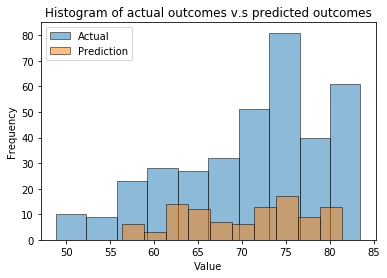

In [35]:
# Check to see if distribution of actual target values is close to the distribution
# of predicted target values
plot_histogram_comp(y,y_test)

<p><b> The government wants to know what are the most important features for your model. Can you tell them? <br> </b> Visualize the top 13 features and their feature importance.

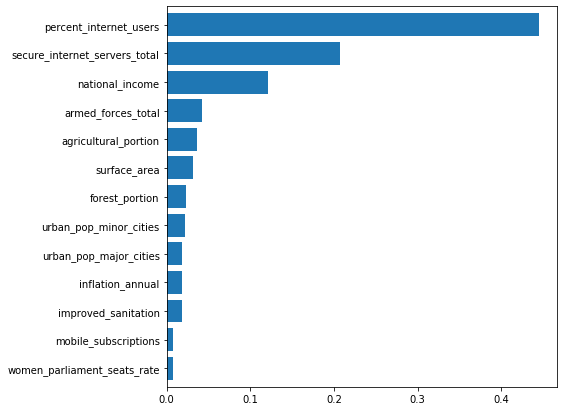

In [38]:
# Extract feature importance determined by RF model
feature_imp = pd.Series(rf.feature_importances_, index=X.columns)
feature_imp.sort_values(ascending=True, inplace=True)

# Creating a bar plot
feature_imp.plot(kind='barh', width=0.8, figsize=(7,7));

Task:
Submit the predictions on the test dataset using your optimized model
For each record in the test set (Test.csv), you must predict the value of the life_expectancy variable. You should submit a CSV file with a header row and one row per test entry. The file (submissions.csv) should have exactly 2 columns:
The file (submissions.csv) should have exactly 2 columns:

* id
* life_expectancy

In [39]:
# Create a submission_df
d = {'id': test_data.index, 'life_expectancy': y_test}
submission_df = pd.DataFrame(data=d)
submission_df

,id,life_expectancy
0,9,64.247913
1,16,70.903489
2,19,77.025581
3,23,67.400759
4,28,73.341393
...,...,...
95,433,56.318858
96,441,76.255407
97,443,67.750243
98,453,62.153906


In [40]:
#Submission
submission_df.to_csv('submissions.csv',index=False)